In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子（可重复结果）
np.random.seed(42)

# 参数设置
days = 500
initial_price = 100
volatility = 0.02  # 日波动率
trend = 0.0005     # 小幅上涨趋势


# 生成对数收益率（正态分布）
log_returns = np.random.normal(trend, volatility, days)

# 累积对数收益率 → 得到价格序列
price_series = initial_price * np.exp(np.cumsum(log_returns))


# 添加一些“真实感”：偶尔大波动（模拟市场冲击）
shock_days = np.random.choice(days, size=10, replace=False)
log_returns[shock_days] += np.random.normal(0, 0.1, 10)  # 大幅波动
price_series = initial_price * np.exp(np.cumsum(log_returns))

print(f"生成了 {len(price_series)} 天的股票价格数据")

生成了 500 天的股票价格数据


/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32929 (\N{CJK U

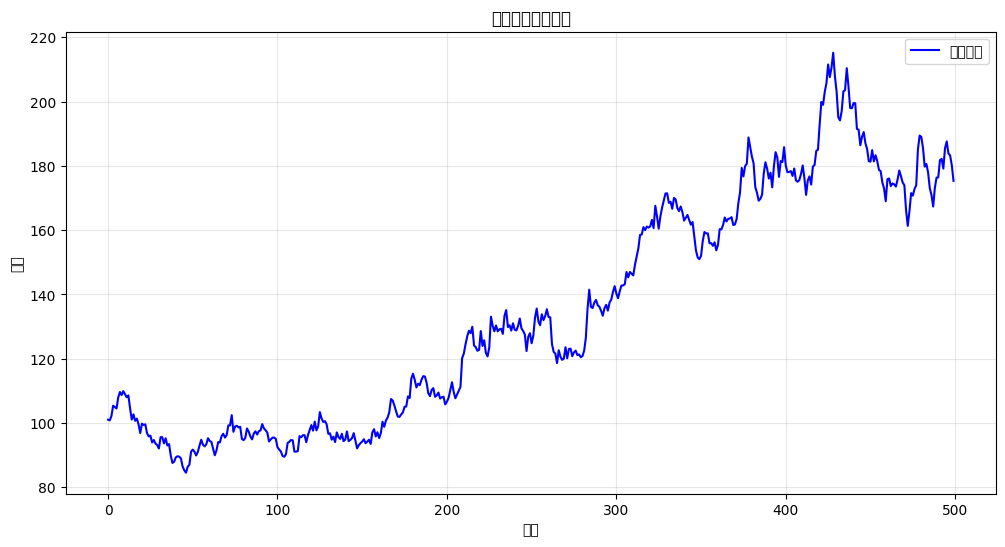

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(price_series, label="股票价格", color='blue')
plt.title("模拟股票价格序列")
plt.xlabel("天数")
plt.ylabel("价格")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
window_size = 20
kernel = np.ones(window_size) / window_size  # 平均核

# 使用 convolve 计算移动平均 MA
ma = np.convolve(price_series, kernel, mode='valid')

# 注意：convolve 返回长度为 len(data) - window_size + 1
# 所以我们要补上前面的缺失值
ma_padded = np.concatenate([np.full(window_size - 1, np.nan), ma])

print(f"移动平均后长度: {len(ma_padded)}")

移动平均后长度: 500


/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/babyzed/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31227 (\N{CJK U

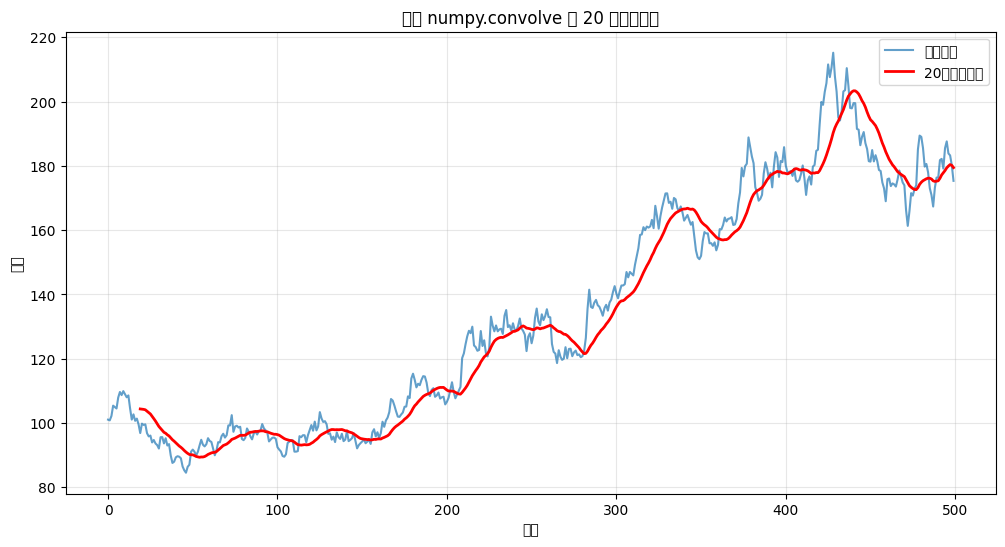

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(price_series, label="原始价格", alpha=0.7)
plt.plot(ma_padded, label=f"{window_size}日移动平均", color='red', linewidth=2)
plt.title(f"使用 numpy.convolve 的 {window_size} 日移动平均")
plt.xlabel("天数")
plt.ylabel("价格")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()